# Import libraries and dataset

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 200

In [34]:
df = pd.read_csv(r"C:\Users\Cris\Documents\Repos\TitanicML\titanic_train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Exploratory Data Analysis

In [35]:
# Drop Passenger ID since it is redundant
df.drop(columns=["PassengerId"], inplace=True)

# Turn sex into one-hot, 1 is female, 0 is male
df["Sex"] = pd.get_dummies(df.Sex)["female"]
df.head()

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  38.0      1      0          PC 17599  71.2833   C85        C  
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  35.0      1      0            113803  53.1000  C123        S  
4  35.0      0      0            373450   8.0500   NaN        S

In [36]:
df.describe()

Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  714.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.352413   29.699118    0.523008    0.381594   
std      0.486592    0.836071    0.477990   14.526497    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   20.125000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   38.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare  
count  891.000000  
mean    32.204208  
std     49.693429  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max    512.329200

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    uint8  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4), uint8(1)
memory usage: 70.6+ KB


## Age

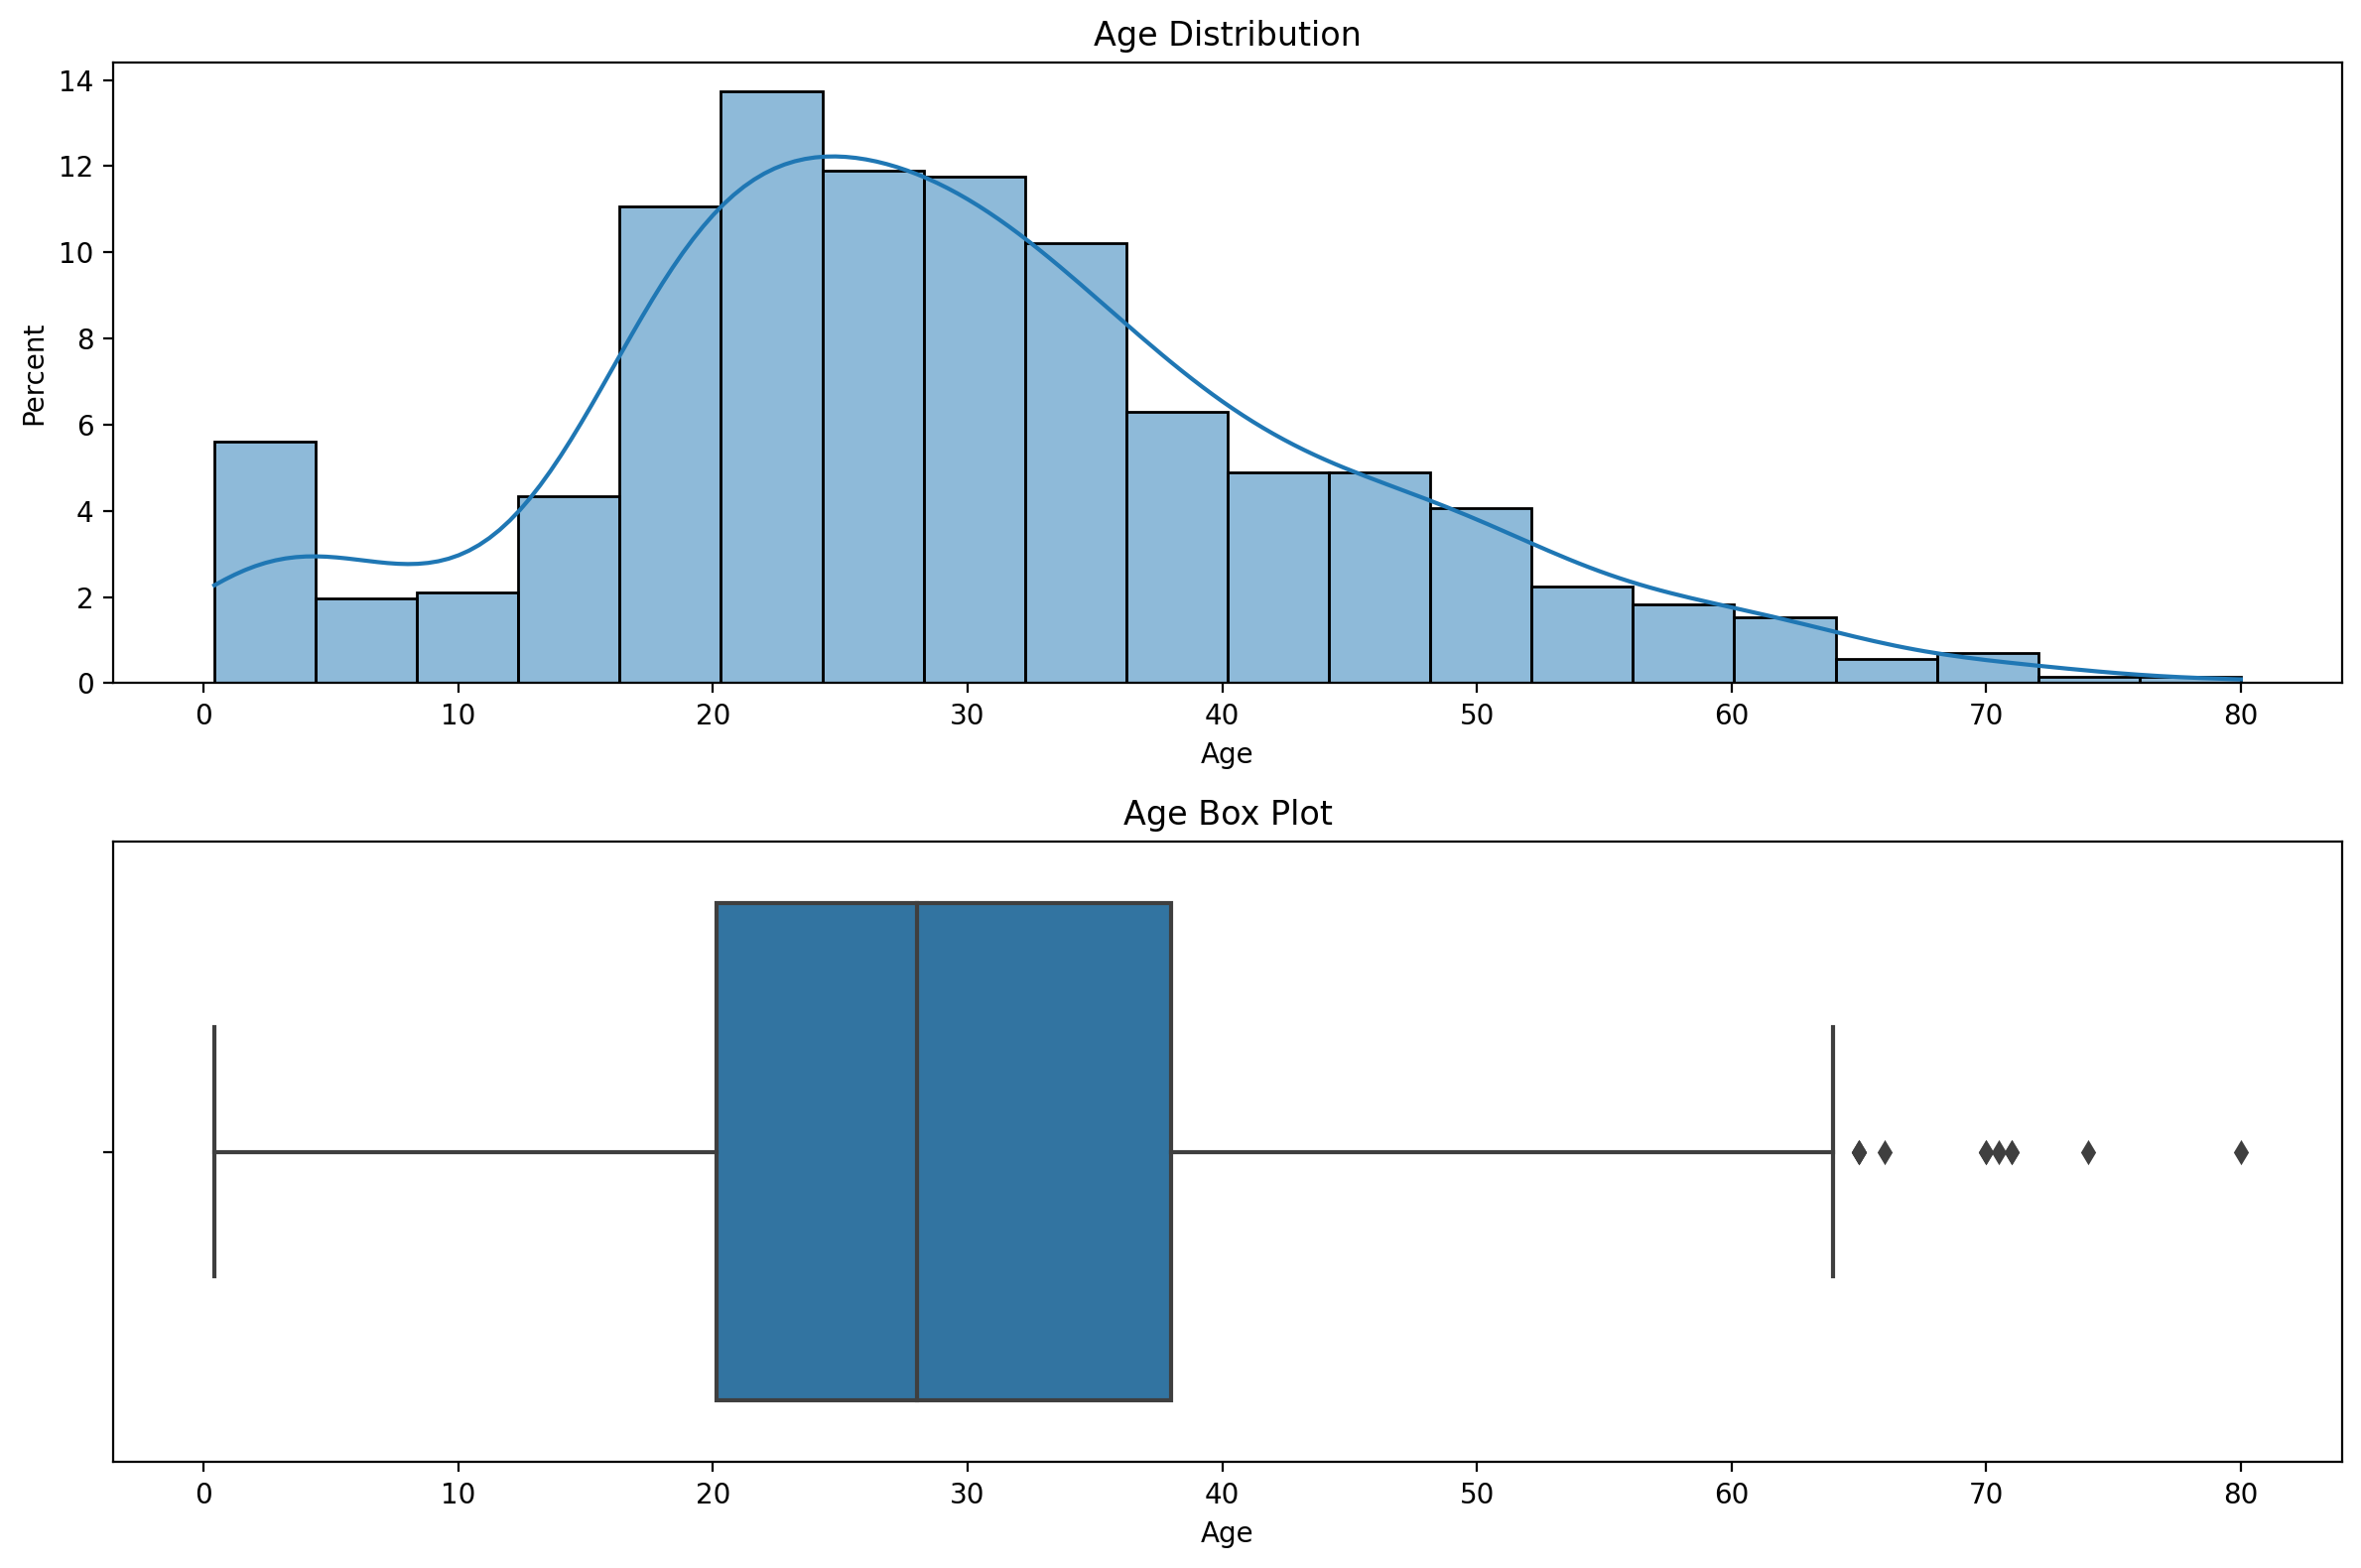

In [38]:
fig, axes = plt.subplots(2, figsize=(12,8))

sns.histplot(df.Age, kde=True, stat="percent", ax = axes[0])
axes[0].set_title("Age Distribution")

sns.boxplot(x=df.Age, ax=axes[1])
axes[1].set_title("Age Box Plot")

plt.tight_layout()
plt.show()

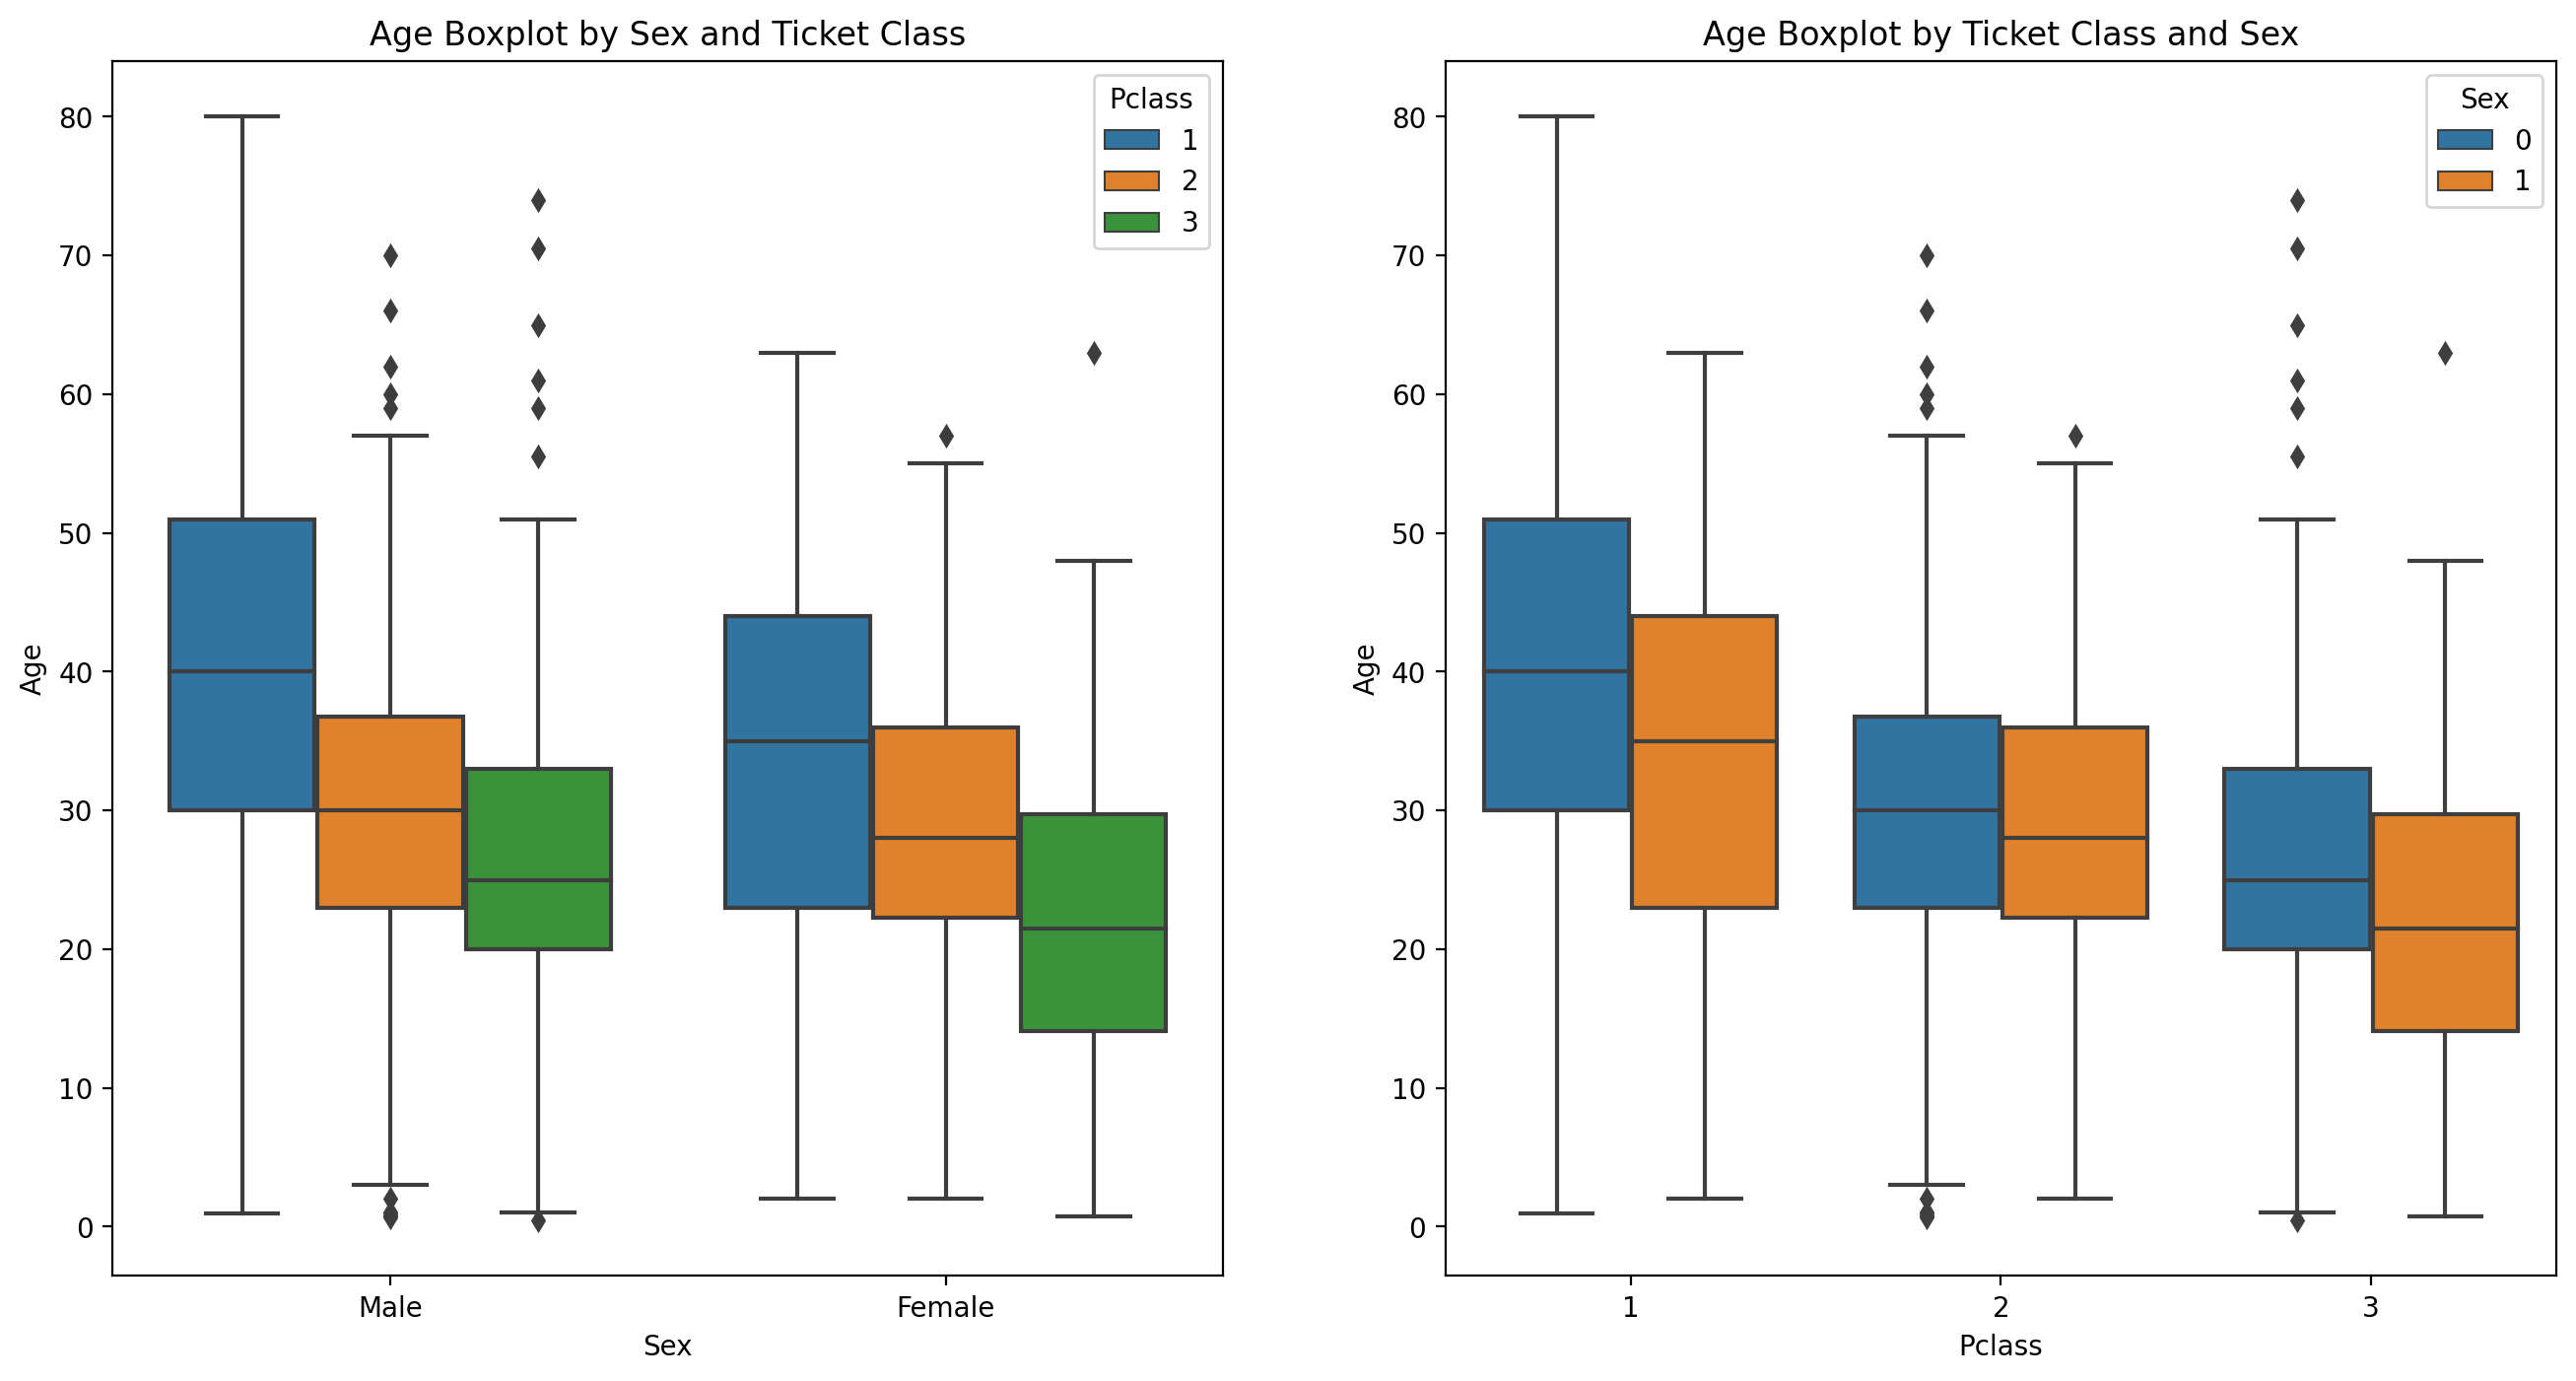

In [50]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

sns.boxplot(data=df, x="Sex", y="Age", hue="Pclass", ax=axes[0])
axes[0].set_xticks(ticks=[0, 1], labels=["Male", "Female"])
axes[0].set_title("Age Boxplot by Sex and Ticket Class")

sns.boxplot(data=df, x="Pclass", y="Age", hue="Sex", ax=axes[1])
axes[1].set_title("Age Boxplot by Ticket Class and Sex")

plt.show()

From this boxplot comparison it becomes evident that the class has a greater influence on age than sex. This makes sense since as you grow old you can make more money to purchase a more expensive ticket in a higher class.

# Fare

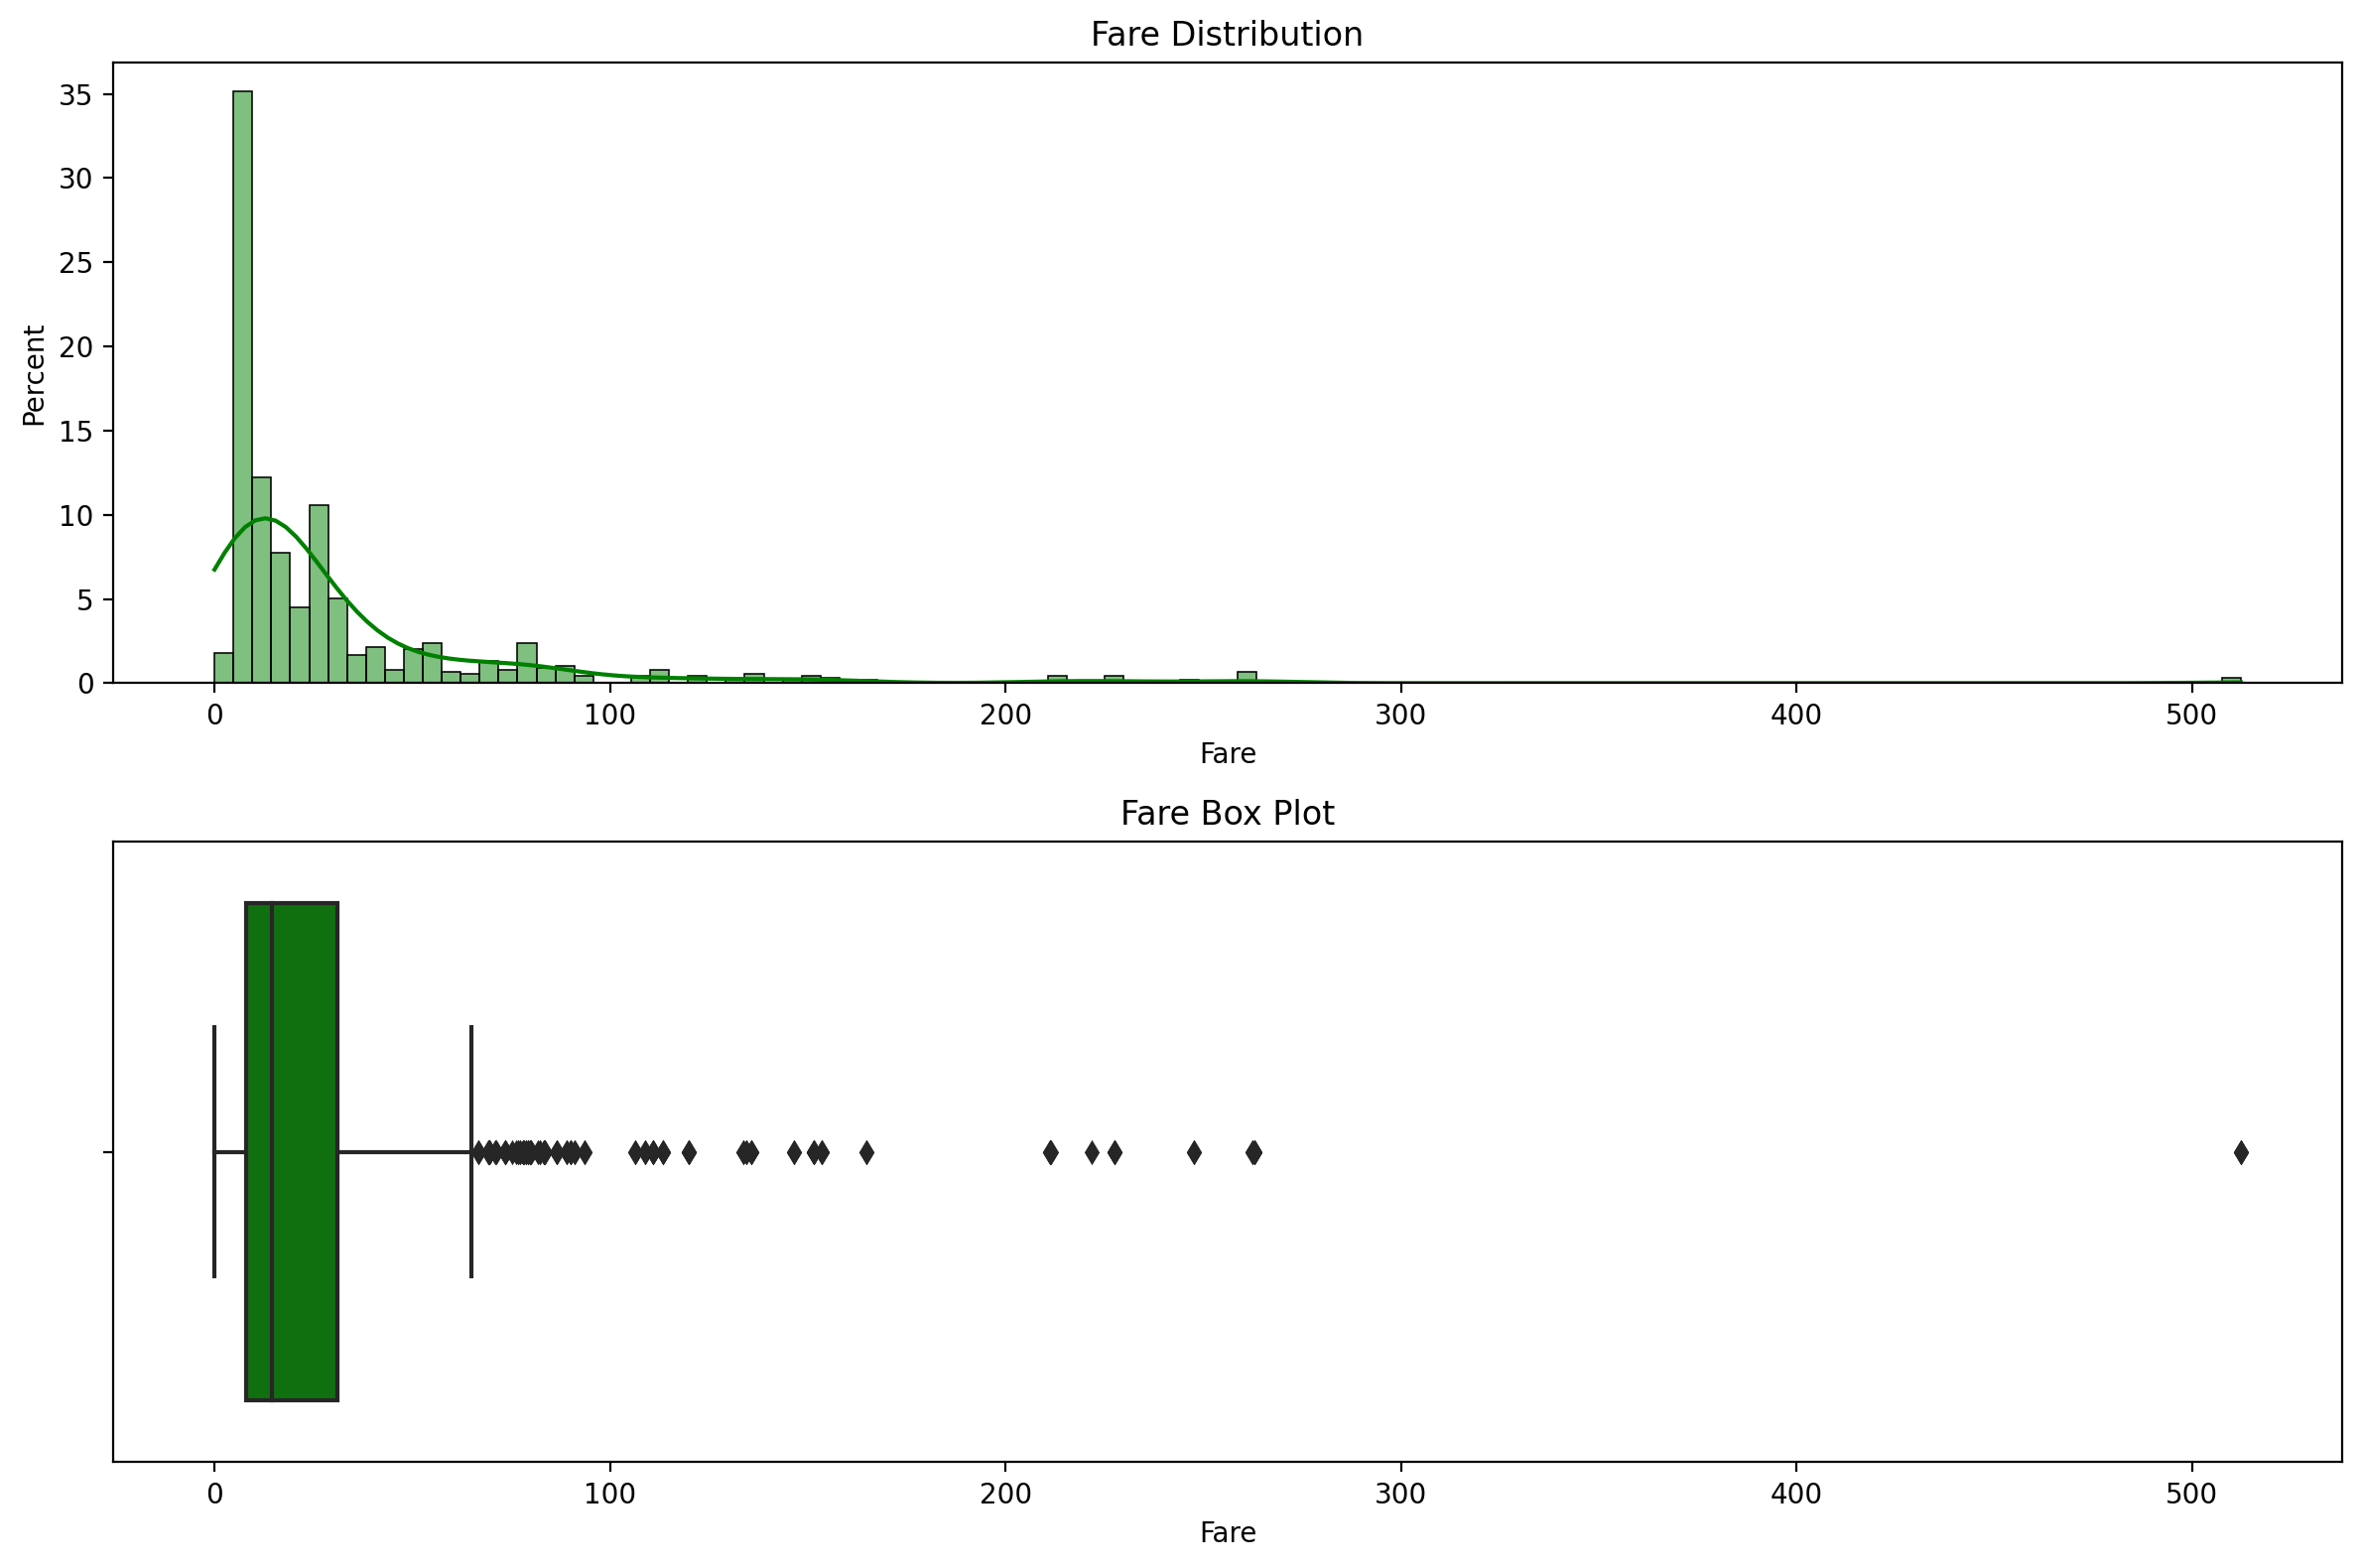

In [57]:
fig, axes = plt.subplots(2, figsize=(12,8))

sns.histplot(data=df, x="Fare", kde=True, stat="percent", color="green", ax = axes[0])
axes[0].set_title("Fare Distribution")

sns.boxplot(data=df, x="Fare", color="green", ax=axes[1])
axes[1].set_title("Fare Box Plot")

plt.tight_layout()
plt.show()

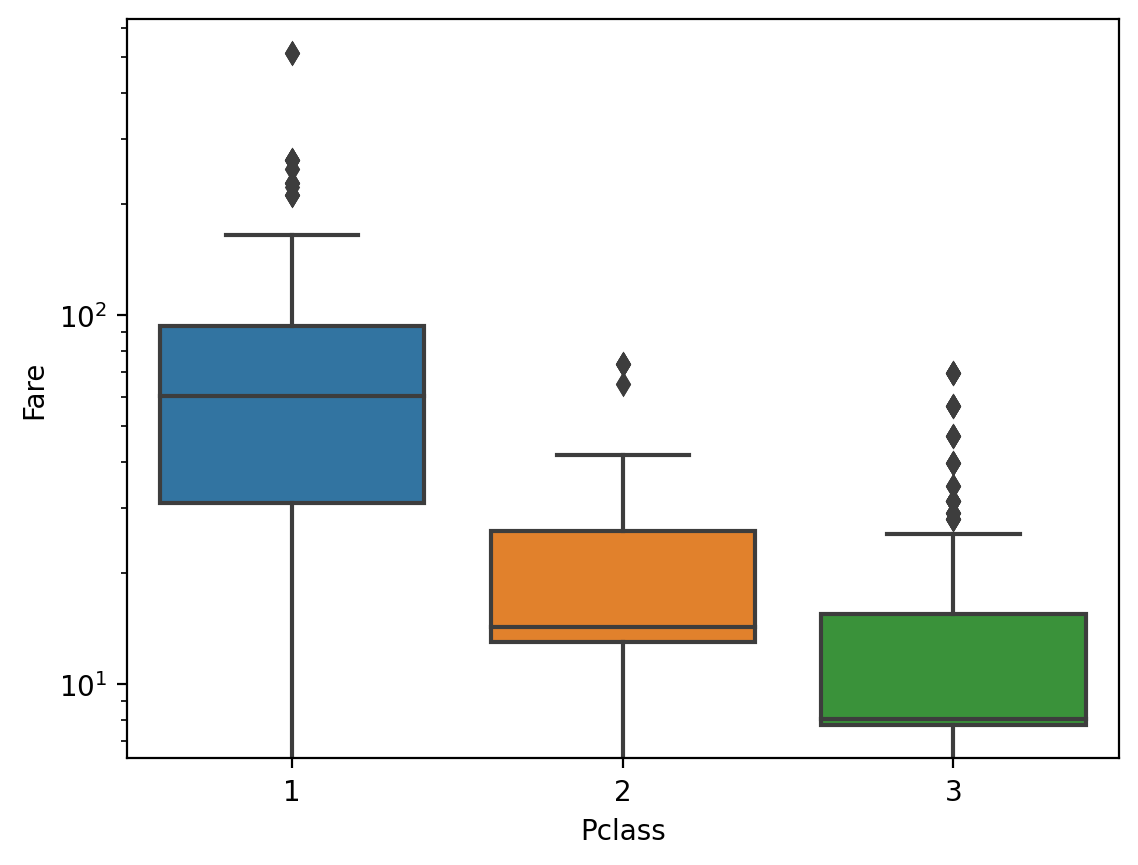

In [52]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x="Pclass", y="Fare")
ax.semilogy()
plt.title("Fare by Ticket Class")
plt.show()

## Null values handling

In [41]:
# df.Age.fillna(df.Age.mean, inplace=True)

# Feature Extraction

In [42]:
# Lone travelers
alone = (df.SibSp < 1) & (df.Parch < 1)
df["Alone"] = alone.astype(int)

In [43]:
# Ticket Class
df[["Class1", "Class2", "Class3"]] = pd.get_dummies(df.Pclass)

In [44]:
# Embarking place
df[["Cherbourg", "Queenstown", "Southampton"]] = pd.get_dummies(df.Embarked)
# df.drop(columns=["Embarked", "Pclass"], inplace=True)

## Cabins and Classes

In [45]:
cabin = df[df.Cabin.notna()].dropna()

decks = ["A", "B", "C", "D", "E"]
for d in decks:
    titanic_class = cabin.Cabin.str.contains(d).astype(int)
    cabin["Deck_"+d] = titanic_class

cabin.sum(numeric_only=True)

Survived         123.0000
Pclass           218.0000
Sex               88.0000
Age             6528.4200
SibSp             85.0000
Parch             87.0000
Fare           14398.8918
Alone             79.0000
Class1           158.0000
Class2            15.0000
Class3            10.0000
Cherbourg         65.0000
Queenstown         2.0000
Southampton      116.0000
Deck_A            12.0000
Deck_B            43.0000
Deck_C            51.0000
Deck_D            31.0000
Deck_E            30.0000
dtype: float64

In [46]:
# fig, ax = plt.subplots(figsize=(14,8))
# sns.heatmap(cabin.corr(numeric_only=True), annot=True)
# plt.show()

In [47]:
# for i,d in enumerate(decks):
#     titanic_class = first_class_cabin.str.contains(d).astype(int)
#     first_class_cabin[[d]] = titanic_class

In [48]:
# Feature extraction idea: family divisions? Lone travelers?
# df[df.Name.str.contains("Palsson")]
# df[(df.SibSp < 2) & (df.Parch > 2)]

# Travel alone category
# Parent, number of children
# Child, number of siblings